## Heart Failure Clinical Records

The dataset can be found in the following link:

https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"../Data/heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.shape

(299, 13)

In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
df['DEATH_EVENT'].value_counts(normalize=True)*100

DEATH_EVENT
0    67.892977
1    32.107023
Name: proportion, dtype: float64

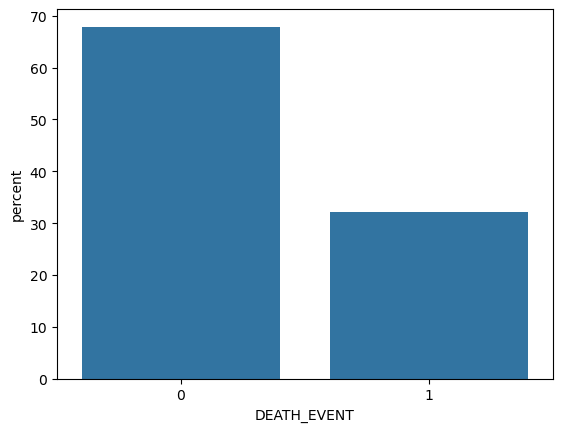

In [11]:
sns.countplot(data=df, x='DEATH_EVENT', stat='percent');

# Around 68% of the patients with heart failure died while 32% didn't die, therefore the data is imbalanced in this respect. 
# Resampling techniques will be employed to mitigate this effect.

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

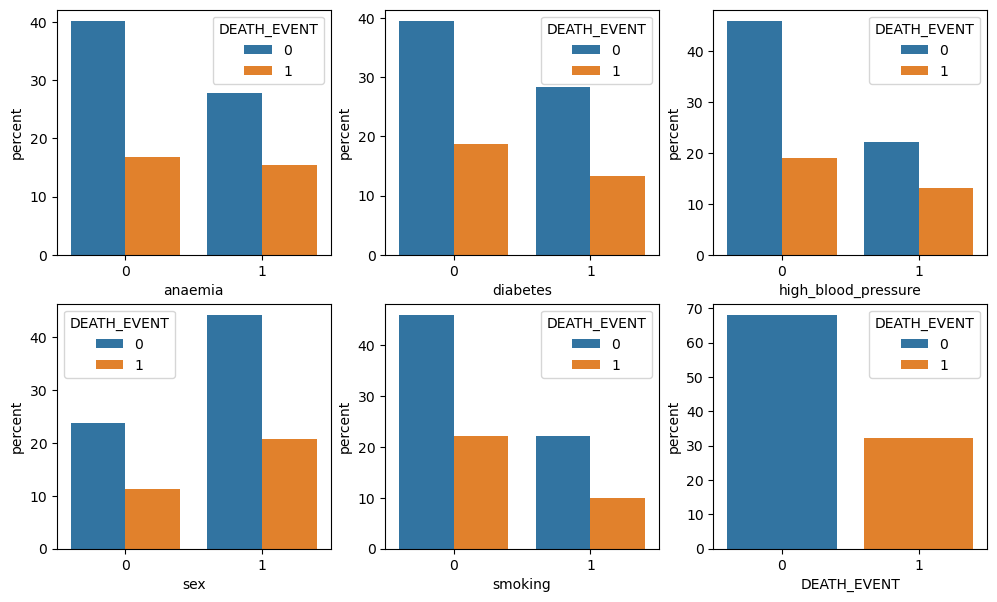

In [13]:
fig, axes = plt.subplots(2,3, figsize=(12,7))

features = list(df.columns)
features.remove('age')
features.remove('creatinine_phosphokinase')
features.remove('ejection_fraction')
features.remove('platelets')
features.remove('serum_creatinine')
features.remove('serum_sodium')
features.remove('time')

for i, feature in enumerate(features,0):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=feature, stat='percent', hue='DEATH_EVENT', hue_order=[0, 1])


From the plots above, it can be seen that the majority of people with heart failure who died did not have anemia, diabetes, or high blood pressure, and most were non-smokers and male. This trend is similar for those with heart failure who did not die.

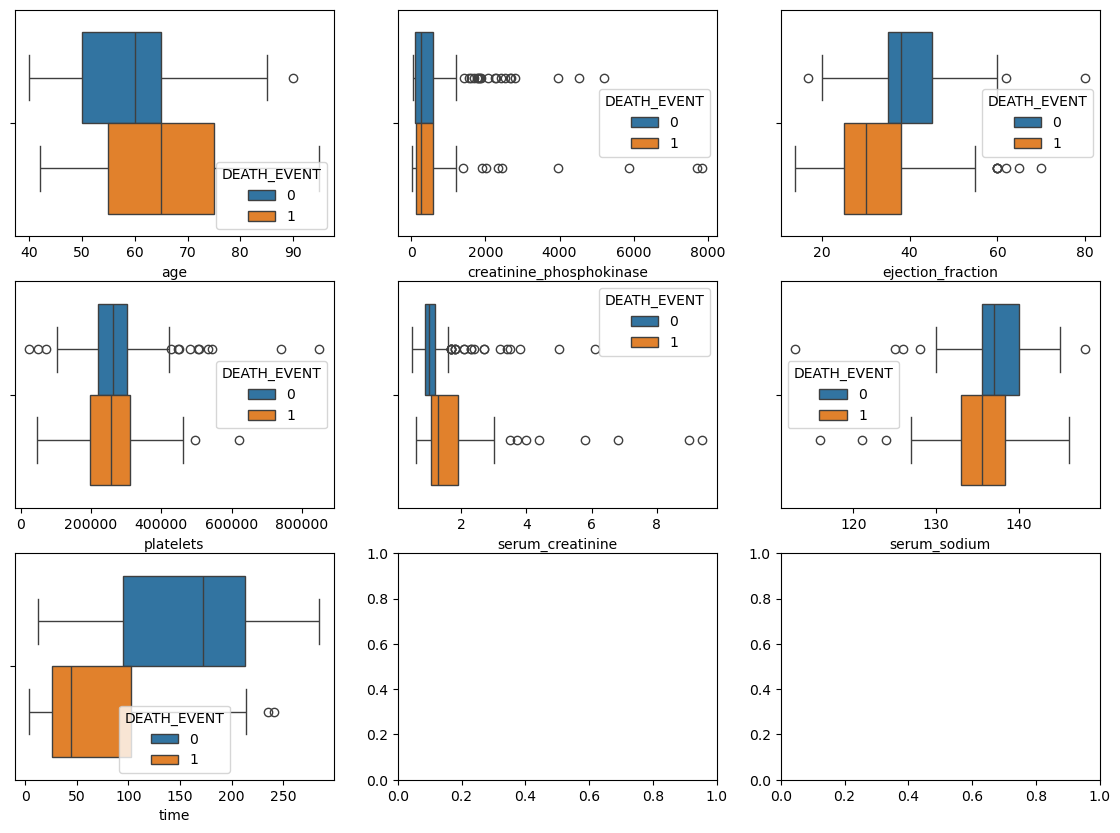

In [14]:
fig, axes = plt.subplots(3,3, figsize=(14,10))

num_columns =['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for i, feature in enumerate(num_columns,0):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=feature, hue='DEATH_EVENT', hue_order=[0, 1])

The figures above clearly show that patients with heart failure who died generally had higher age, lower ejection fraction, higher serum creatinine levels, lower serum sodium levels, and shorter follow-up times.

In [15]:
# finding outliers is not straight forward when dealing with multi-feature data. We will apply an outlier finder algorithm in later sections.

filt = (df['serum_creatinine']>5.5) & (df['creatinine_phosphokinase']>4000) & (df['ejection_fraction']>60)

df[filt]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


<Axes: xlabel='time', ylabel='Count'>

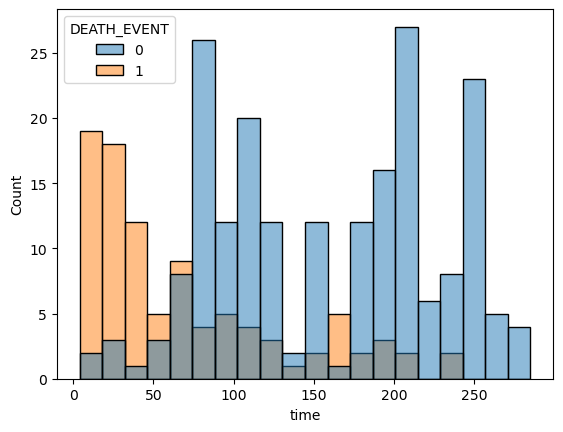

In [16]:
# We can see that majority of cases who died of heart failure have less than 50 days of follow-up time.

sns.histplot(data=df, x='time', hue='DEATH_EVENT', bins=20)

In [17]:
# The patients consisted of 105 women and 194 men. As mentioned in the related paper.

df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

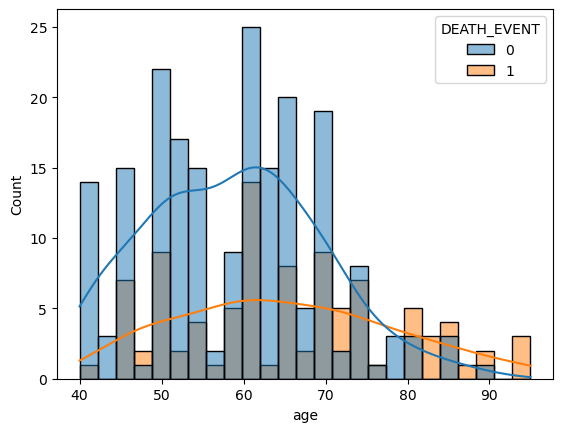

In [18]:
# The distribution of AGE feature.

sns.histplot(df, x='age', kde=True, bins=25, hue='DEATH_EVENT')

# The age distribution is almost the same for patients with heart failure who died or not died. While the median of age is higher for patients who died (from previous plots).

In [19]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [20]:
cat_columns = list(df.columns)

cat_columns.remove('age')
cat_columns.remove('creatinine_phosphokinase')
cat_columns.remove('ejection_fraction')
cat_columns.remove('serum_creatinine')
cat_columns.remove('serum_sodium')
cat_columns.remove('platelets')
cat_columns.remove('time')
cat_columns.remove('DEATH_EVENT')

cat_columns

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [21]:
# Before we proceed with one-hot encoding of categorical features, we make a copy of our data. This form of data will be used later for CatBoost model.

df2 = df.copy()

In [22]:
# One-hot encode the categorical features

df = pd.get_dummies(df, columns=cat_columns, drop_first=True, dtype=int)

df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,0,0,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,0,0,1,1
3,50.0,111,20,210000.00,1.9,137,7,1,1,0,0,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,1,1,0,0,0


In [23]:
X = df.drop('DEATH_EVENT', axis=1)

y = df['DEATH_EVENT']

In [24]:
X.shape

(299, 12)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
X_train.shape

(209, 12)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Outlier detection

For analyzing and detecting the outliers in our dataset, we will use t-SNE method to reduce the dimensionality of our data and visualize it in 2d and 3d. Outliers may appear as points that are distant from the main clusters.

In [31]:
from sklearn.manifold import TSNE

In [32]:
# Because TSNE uses the concept of distance in their algorithm, we use the data after scaling.

tsne = TSNE(n_components=2)

X_total = np.concatenate((X_train, X_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

tsne_result = tsne.fit_transform(X_total)
tsne_result.shape

(299, 2)

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

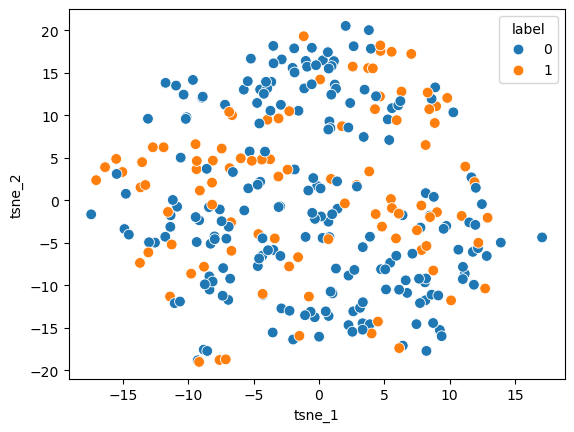

In [33]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y_total})

fig, ax = plt.subplots(1)

sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='label', ax=ax, s=60)

From the plot above, our data points look coherent and no points can be considered as an outlier in our dataset.

In [34]:
# We also calculate the t-SNE for 3 components to verify our previous finding using 2d projection.

tsne_3d = TSNE(n_components=3)

tsne_result_3d = tsne_3d.fit_transform(X_total)
tsne_result_3d.shape

(299, 3)

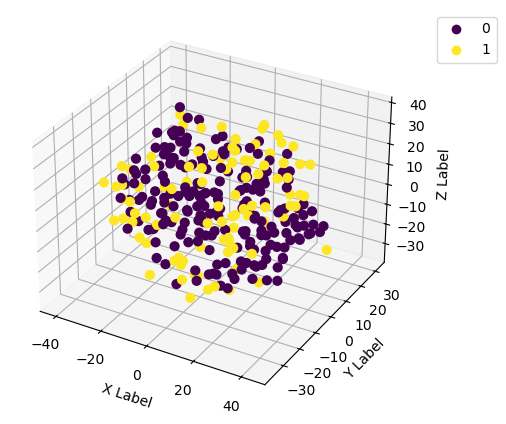

In [35]:
# 3d plot

from mpl_toolkits.mplot3d import Axes3D

x = tsne_result_3d[:,0]
y = tsne_result_3d[:,1]
z = tsne_result_3d[:,2]

fig = plt.figure(figsize=(4,4))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(x, y, z, s=40, c=y_total, marker='o', alpha=1) 
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score, f1_score

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
def cross_validate_model(model, X, y):

    aucs = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    auc_mean = aucs.mean()

    precisions = cross_val_score(model, X, y, cv=5, scoring='precision')
    precision_mean = precisions.mean()

    recalls = cross_val_score(model, X, y, cv=5, scoring='recall')
    recall_mean = recalls.mean()

    f1s = cross_val_score(model, X, y, cv=5, scoring='f1')
    f1_mean = f1s.mean()

    print(f'Mean AUC: {auc_mean:.3f}')
    print(f'Mean Precision: {precision_mean:.3f}')
    print(f'Mean Recall: {recall_mean:.3f}')
    print(f'Mean F1: {f1_mean:.3f}')

    return auc_mean, recall_mean, precision_mean, f1_mean

In [39]:
# Train a Decision Tree model on the resampled data
dt_clf = DecisionTreeClassifier(random_state=42)

cross_validate_model(dt_clf, X_train, y_train);

Mean AUC: 0.732
Mean Precision: 0.634
Mean Recall: 0.611
Mean F1: 0.608


### Resampling

In [40]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.pipeline import Pipeline

In [41]:
# Define the resampling techniques
# Oversample the minority class to match the majority

#over_sampler = SMOTE(sampling_strategy=1.0, random_state=42)   
#over_sampler = BorderlineSMOTE(sampling_strategy=1.0, random_state=42)
#over_sampler = SVMSMOTE(sampling_strategy=1.0, random_state=42)
over_sampler = ADASYN(sampling_strategy=1.0, random_state=42) 

pipeline = Pipeline(steps=[('over', over_sampler)])

In [42]:
import os

# UserWarning: KMeans is known to have a memory leak on Windows with MKL, 
# when there are less chunks than available threads. 
# You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

os.environ['OMP_NUM_THREADS'] = '1'

In [43]:
# Resample the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [44]:
# Train a Decision Tree model on the resampled data
dt_clf = DecisionTreeClassifier(random_state=42)

cross_validate_model(dt_clf, X_resampled, y_resampled);


Mean AUC: 0.831
Mean Precision: 0.815
Mean Recall: 0.848
Mean F1: 0.825


In [45]:
# Setting up a grid of hyperparameters to search over

# Decision Tree Regressor Parameters
dt_param = {'criterion':['entropy', 'gini'],      # ['entropy', 'gini', 'log_loss']
            'max_features':[None,'sqrt','log2'],  # [None,'sqrt','log2']
            'max_depth':[None,8,16,24],           # [None,8,16,24]
            'min_samples_split': [2,5,8]}         # [2,5,8]

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
def model_tunning(model, param_grid, X_train, y_train):
    print(f'Model: {model}')

    gs = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=3, n_jobs=-1) # scoring='roc_auc', recall

    best_est = gs.fit(X_train, y_train)

    df_cv = pd.DataFrame(gs.cv_results_)

    print(f'Best params: {gs.best_params_}')

    return best_est, df_cv

In [48]:
dt_best_estimator, df_dt_cv = model_tunning(dt_clf, dt_param, X_resampled, y_resampled)

Model: DecisionTreeClassifier(random_state=42)
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_split': 2}


In [49]:
df_dt_cv = df_dt_cv.drop(['std_fit_time','mean_score_time','std_score_time','params'], axis=1)

df_dt_cv = df_dt_cv.sort_values('rank_test_score')

df_dt_cv.head(10)

,mean_fit_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.004001,entropy,8,None,2,0.821429,0.785714,0.888889,0.962963,0.814815,0.854762,0.063791,1
54,0.005000,gini,16,None,2,0.785714,0.750000,0.851852,1.000000,0.851852,0.847884,0.085577,2
45,0.003000,gini,8,None,2,0.785714,0.750000,0.851852,1.000000,0.851852,0.847884,0.085577,2
36,0.003401,gini,None,None,2,0.785714,0.750000,0.851852,1.000000,0.851852,0.847884,0.085577,2
63,0.003402,gini,24,None,2,0.785714,0.750000,0.851852,1.000000,0.851852,0.847884,0.085577,2
27,0.004599,entropy,24,None,2,0.821429,0.821429,0.888889,0.925926,0.777778,0.847090,0.053073,6
18,0.003800,entropy,16,None,2,0.821429,0.821429,0.888889,0.925926,0.777778,0.847090,0.053073,6
0,0.005407,entropy,None,None,2,0.821429,0.821429,0.888889,0.925926,0.777778,0.847090,0.053073,6
37,0.003406,gini,None,None,5,0.821429,0.678571,0.888889,0.962963,0.851852,0.840741,0.093864,9
64,0.003801,gini,24,None,5,0.821429,0.678571,0.888889,0.962963,0.851852,0.840741,0.093864,9


In [50]:
dt_best_params_dict = dt_best_estimator.best_params_

dt_best_params_dict

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'min_samples_split': 2}

In [51]:
# Evaluate the tunned model using cross_val_score:

dt_clf_tunned = DecisionTreeClassifier(**dt_best_params_dict, random_state=42)

cross_validate_model(dt_clf_tunned, X_resampled, y_resampled);

Mean AUC: 0.848
Mean Precision: 0.822
Mean Recall: 0.855
Mean F1: 0.835


In [52]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

In [53]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    auc_value = roc_auc_score(y_test, y_pred_proba[:,-1])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'AUC: {auc_value:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1: {f1:.3f}')

    print(f'===================================')

    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    print(f'===================================')

    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

In [54]:
# Model evaluation for the best decision tree

evaluate_model(dt_best_estimator, X_test, y_test)

AUC: 0.754
Precision: 0.767
Recall: 0.622
F1: 0.687
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Confusion Matrix:
[[46  7]
 [14 23]]


In [55]:
def draw_feature_importance(gs_best_estimator, X):

    feature_imp = pd.DataFrame(gs_best_estimator.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending=False)

    feature_imp.plot(kind='bar')


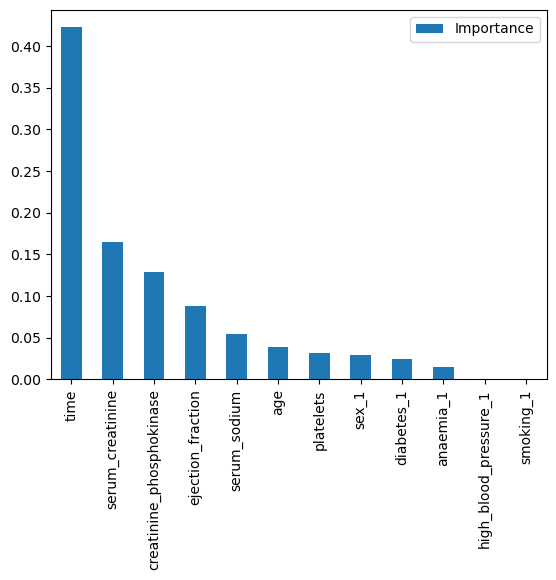

In [56]:
draw_feature_importance(dt_best_estimator, X)

The next model that we will be examining is `RandomForestClassifier` from `sklearn`. We will first get the baseline performance of the model using `cross_val_score`.
We then search for the best hyperparameters of the model using `GridSearchCV`. 
Finally, we will evaluate and report the performance of the best found model on the holdout Test set.

In [57]:
# Evaluate the base model using cross_val_score:

rf_clf = RandomForestClassifier(random_state=42)

cross_validate_model(rf_clf, X_resampled, y_resampled);

Mean AUC: 0.967
Mean Precision: 0.888
Mean Recall: 0.905
Mean F1: 0.891


### Random Forest Model Tunning

In this part, we will search for the best hyperparameters for our Random Forest model using `GridSearchCV`.

In [58]:
# Setting up a grid of hyperparameters to search over

# Random Forest parameters
rf_param = {
            'max_depth': [None,8,16,24],          # None,8,16,24
            'max_features':[None,'sqrt','log2'],  # None,'sqrt','log2'
            'min_samples_split': [2,5,8],         # 2,5,8
            'n_estimators':[80,120,240,300,600]   # 80,120,240,300,600,1200
           }

In [59]:
rf_best_estimator, df_rf_cv = model_tunning(rf_clf, rf_param, X_resampled, y_resampled)

Model: RandomForestClassifier(random_state=42)
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 80}


c:\ProgramData\Anaconda3\envs\new\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [60]:
df_rf_cv = df_rf_cv.drop(['std_fit_time','mean_score_time','std_score_time','params'], axis=1)

df_rf_cv = df_rf_cv.sort_values('rank_test_score')

# Have a look at first 10 best models according to performance score
df_rf_cv.head(10)

,mean_fit_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,0.217839,8,sqrt,2,80,0.928571,0.857143,0.962963,1.0,0.814815,0.912698,0.067923,1
75,0.222558,8,log2,2,80,0.928571,0.857143,0.962963,1.0,0.814815,0.912698,0.067923,1
160,0.279301,24,sqrt,8,80,0.964286,0.857143,0.962963,1.0,0.777778,0.912434,0.082582,3
130,0.349155,16,log2,8,80,0.964286,0.857143,0.962963,1.0,0.777778,0.912434,0.082582,3
25,0.230530,None,sqrt,8,80,0.964286,0.857143,0.962963,1.0,0.777778,0.912434,0.082582,3
40,0.217469,None,log2,8,80,0.964286,0.857143,0.962963,1.0,0.777778,0.912434,0.082582,3
175,0.246557,24,log2,8,80,0.964286,0.857143,0.962963,1.0,0.777778,0.912434,0.082582,3
115,0.204015,16,sqrt,8,80,0.964286,0.857143,0.962963,1.0,0.777778,0.912434,0.082582,3
120,0.241362,16,log2,2,80,0.928571,0.821429,0.962963,1.0,0.814815,0.905556,0.074908,9
15,0.233887,None,sqrt,2,80,0.928571,0.821429,0.962963,1.0,0.814815,0.905556,0.074908,9


In [61]:
# Best hyperparameters found:

rf_best_params_dict = rf_best_estimator.best_params_

rf_best_params_dict

{'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 80}

In [62]:
# Evaluate the tunned model using cross_val_score:

rf_clf_tunned = RandomForestClassifier(**rf_best_params_dict, random_state=42)

cross_validate_model(rf_clf_tunned, X_resampled, y_resampled);

Mean AUC: 0.964
Mean Precision: 0.887
Mean Recall: 0.913
Mean F1: 0.896


In [63]:
# Evaluate the performance of the model on holdout test set.

evaluate_model(rf_best_estimator, X_test, y_test)

AUC: 0.873
Precision: 0.800
Recall: 0.649
F1: 0.716
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        53
           1       0.80      0.65      0.72        37

    accuracy                           0.79        90
   macro avg       0.79      0.77      0.77        90
weighted avg       0.79      0.79      0.78        90

Confusion Matrix:
[[47  6]
 [13 24]]


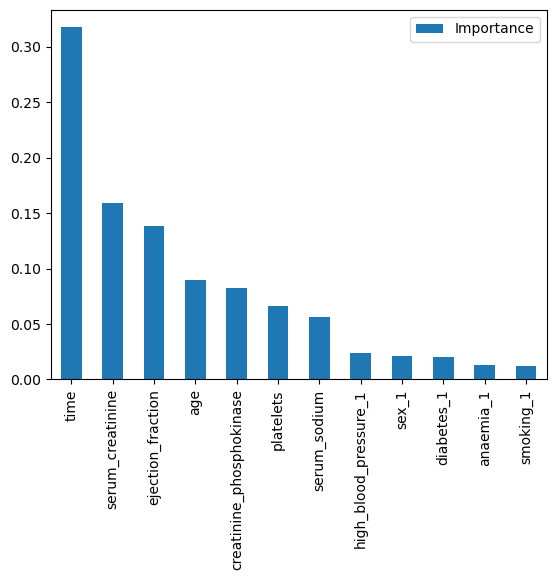

In [64]:
draw_feature_importance(rf_best_estimator, X)

### XGBoost
In this section, we will be using `XGBClassifier` from `xgboost` package. We will first get the baseline performance of the model using `cross_val_score`.
We then search for the best hyperparameters of the model using `GridSearchCV`. 
Finally, we will evaluate and report the performance of the best found model on the Test set.

In [65]:
# import the necessary libraries

from xgboost import XGBClassifier

In [66]:
# Evaluate the model before tunning. The mean performance evaluation metrics, namely recall and AUC, will be recorded.

xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)

cross_validate_model(rf_clf, X_resampled, y_resampled);

Mean AUC: 0.967
Mean Precision: 0.888
Mean Recall: 0.905
Mean F1: 0.891


In [67]:
# Setting up a grid of hyperparameters to search over

# XGBoost parameters
xgb_param = {
            'max_depth':[0,8,16,24],      # 0,8,16,24
            'learning_rate':[.1,.3,.6,1],  # .1,.3,.6,1
            'n_estimators':[16,32,64,128]   # 16,32,64,128
            }

In [68]:
xgb_best_estimator, df_xgb_cv = model_tunning(xgb_clf, xgb_param, X_resampled, y_resampled)

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\ProgramData\Anaconda3\envs\new\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'learning_rate': 1, 'max_depth': 0, 'n_estimators': 32}


In [69]:
df_xgb_cv = df_xgb_cv.drop(['std_fit_time','mean_score_time','std_score_time','params'], axis=1)

df_xgb_cv = df_xgb_cv.sort_values('rank_test_score')

# Have a look at first 10 best models according to performance score
df_xgb_cv.head(10)

,mean_fit_time,param_learning_rate,param_max_depth,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,0.020338,1.0,0,32,0.821429,0.857143,0.962963,1.0,0.925926,0.913492,0.065934,1
62,0.029154,1.0,24,64,0.821429,0.857143,0.962963,1.0,0.925926,0.913492,0.065934,1
53,0.023847,1.0,8,32,0.821429,0.857143,0.962963,1.0,0.925926,0.913492,0.065934,1
61,0.020614,1.0,24,32,0.821429,0.857143,0.962963,1.0,0.925926,0.913492,0.065934,1
50,0.028257,1.0,0,64,0.821429,0.857143,0.962963,1.0,0.925926,0.913492,0.065934,1
54,0.029261,1.0,8,64,0.821429,0.857143,0.962963,1.0,0.925926,0.913492,0.065934,1
57,0.021398,1.0,16,32,0.821429,0.857143,0.962963,1.0,0.925926,0.913492,0.065934,1
58,0.027999,1.0,16,64,0.821429,0.857143,0.962963,1.0,0.925926,0.913492,0.065934,1
63,0.043781,1.0,24,128,0.821429,0.821429,0.962963,1.0,0.925926,0.906349,0.073187,9
55,0.056684,1.0,8,128,0.821429,0.821429,0.962963,1.0,0.925926,0.906349,0.073187,9


In [70]:
# Best hyperparameters found:

xgb_best_params_dict = xgb_best_estimator.best_params_

xgb_best_params_dict

{'learning_rate': 1, 'max_depth': 0, 'n_estimators': 32}

In [71]:
# Evaluate the tunned model using cross_val_score:

xgb_clf_tunned = XGBClassifier(**xgb_best_params_dict, objective='binary:logistic', random_state=42)

cross_validate_model(xgb_clf_tunned, X_resampled, y_resampled);

Mean AUC: 0.942
Mean Precision: 0.859
Mean Recall: 0.913
Mean F1: 0.883


In [72]:
# Evaluate the performance of the model on holdout test set.

evaluate_model(xgb_best_estimator, X_test, y_test)

AUC: 0.854
Precision: 0.733
Recall: 0.595
F1: 0.657
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        53
           1       0.73      0.59      0.66        37

    accuracy                           0.74        90
   macro avg       0.74      0.72      0.73        90
weighted avg       0.74      0.74      0.74        90

Confusion Matrix:
[[45  8]
 [15 22]]


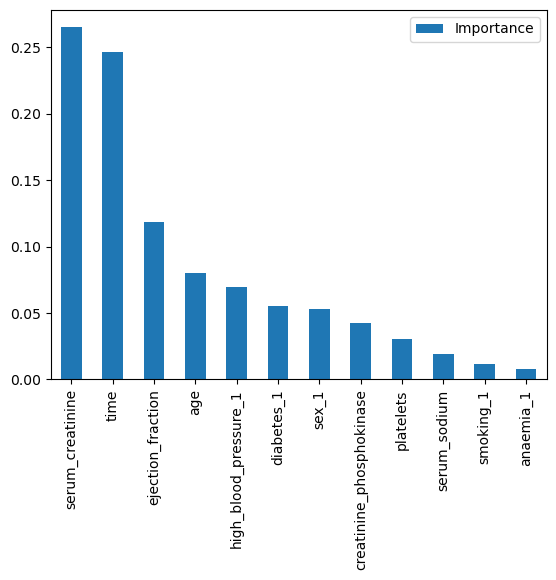

In [73]:
draw_feature_importance(xgb_best_estimator, X)

### CatBoost Model

In this section, we will be using `CatBoostClassifier` from `catboost` package. Catboost accepts categorical features natively, and we don't need to one-hot encode the categorical features. Also, because we are using a tree-based method, no scaling is required. We will first get the baseline performance of the model using `cross_val_score`.
We then search for the best hyperparameters of the model using `GridSearchCV`. 
Finally, we will evaluate and report the performance of the best found model on the Test set.

In [74]:
cat_columns

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [75]:
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [76]:
X = df2.drop('DEATH_EVENT', axis=1)
y = df2['DEATH_EVENT']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [78]:
from catboost import CatBoostClassifier

Because we are using categorical features natively, we cannot use SMOTE or ADASYN functions for oversampling. In order to compensate for the imbalanced dataset, the `auto_class_weights` parameter in the constructor of `CatBoostClassifier` is used. This way, each sample will be multiplied by a weight according to their class weight, computed automatically by catboost. For calculating class weights we could have used `compute_class_weight` from scikit-learn library and pass the weights to `class_weight` parameter in the `CatBoostClassifier` constructor.

In [79]:
cat_model = CatBoostClassifier(cat_features=cat_columns, auto_class_weights='Balanced', iterations=1000, random_seed=42, verbose=200)

cross_validate_model(cat_model, X_train, y_train);

Learning rate set to 0.004798
0:	learn: 0.6890301	total: 132ms	remaining: 2m 11s
200:	learn: 0.2748345	total: 425ms	remaining: 1.69s
400:	learn: 0.1662396	total: 713ms	remaining: 1.06s
600:	learn: 0.1154453	total: 1s	remaining: 667ms
800:	learn: 0.0856613	total: 1.3s	remaining: 324ms
999:	learn: 0.0654719	total: 1.57s	remaining: 0us
Learning rate set to 0.004798
0:	learn: 0.6900336	total: 1.42ms	remaining: 1.41s
200:	learn: 0.3095815	total: 284ms	remaining: 1.13s
400:	learn: 0.1956148	total: 598ms	remaining: 894ms
600:	learn: 0.1381696	total: 967ms	remaining: 642ms
800:	learn: 0.1029476	total: 1.31s	remaining: 326ms
999:	learn: 0.0780168	total: 1.62s	remaining: 0us
Learning rate set to 0.004798
0:	learn: 0.6895176	total: 1.67ms	remaining: 1.67s
200:	learn: 0.3132545	total: 343ms	remaining: 1.36s
400:	learn: 0.2039758	total: 693ms	remaining: 1.03s
600:	learn: 0.1475525	total: 1.03s	remaining: 687ms
800:	learn: 0.1115306	total: 1.34s	remaining: 332ms
999:	learn: 0.0863591	total: 1.64s	re

In [80]:
# Setting up a grid of hyperparameters to search over

# CatBoost Parameters
cb_param = {
            'learning_rate':[.1], # .01,.1,.3,.6,1
            'depth':[3],          # 3,4,8,10
            'subsample': [0.7],   # 0.5,0.7,0.9,1.0
            'iterations': [100],  # 100,500,1000
           }      

In [81]:
cb_best_estimator, df_cb_cv = model_tunning(cat_model, cb_param, X_train, y_train)

Model: <catboost.core.CatBoostClassifier object at 0x000001F1B8036550>
Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.6537586	total: 426us	remaining: 42.2ms
99:	learn: 0.2074862	total: 39.5ms	remaining: 0us
Best params: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1, 'subsample': 0.7}


In [82]:
df_cb_cv = df_cb_cv.drop(['std_fit_time','mean_score_time','std_score_time','params'], axis=1)

df_cb_cv = df_cb_cv.sort_values('rank_test_score')

# Have a look at first 10 best models according to performance score
df_cb_cv.head(10)

,mean_fit_time,param_depth,param_iterations,param_learning_rate,param_subsample,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.2856,3,100,0.1,0.7,0.833333,0.916667,1.0,0.666667,0.909091,0.865152,0.112407,1


In [83]:
# Best hyperparameters found:

cb_best_params_dict = cb_best_estimator.best_params_

cb_best_params_dict

{'depth': 3, 'iterations': 100, 'learning_rate': 0.1, 'subsample': 0.7}

In [84]:
# Evaluate the tunned model using cross_val_score:

cb_clf_tunned = CatBoostClassifier(**cb_best_params_dict, random_state=42)

cross_validate_model(cb_clf_tunned, X_train, y_train);

0:	learn: 0.6456347	total: 666us	remaining: 66ms
1:	learn: 0.6062180	total: 1.45ms	remaining: 70.8ms
2:	learn: 0.5680702	total: 1.94ms	remaining: 62.7ms
3:	learn: 0.5329261	total: 2.4ms	remaining: 57.7ms
4:	learn: 0.5043676	total: 2.87ms	remaining: 54.6ms
5:	learn: 0.4759388	total: 3.9ms	remaining: 61ms
6:	learn: 0.4539430	total: 4.46ms	remaining: 59.2ms
7:	learn: 0.4319193	total: 6.41ms	remaining: 73.7ms
8:	learn: 0.4194466	total: 6.96ms	remaining: 70.4ms
9:	learn: 0.4013858	total: 7.42ms	remaining: 66.8ms
10:	learn: 0.3896873	total: 7.85ms	remaining: 63.5ms
11:	learn: 0.3768529	total: 8.22ms	remaining: 60.3ms
12:	learn: 0.3663755	total: 8.64ms	remaining: 57.8ms
13:	learn: 0.3550723	total: 9.42ms	remaining: 57.9ms
14:	learn: 0.3445702	total: 9.95ms	remaining: 56.4ms
15:	learn: 0.3382772	total: 10.4ms	remaining: 54.9ms
16:	learn: 0.3305414	total: 10.9ms	remaining: 53.1ms
17:	learn: 0.3264405	total: 11.4ms	remaining: 51.7ms
18:	learn: 0.3176503	total: 11.8ms	remaining: 50.4ms
19:	learn:

In [85]:
# Evaluate the performance of the model on holdout test set.

evaluate_model(cb_best_estimator, X_test, y_test)

AUC: 0.861
Precision: 0.800
Recall: 0.649
F1: 0.716
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        53
           1       0.80      0.65      0.72        37

    accuracy                           0.79        90
   macro avg       0.79      0.77      0.77        90
weighted avg       0.79      0.79      0.78        90

Confusion Matrix:
[[47  6]
 [13 24]]


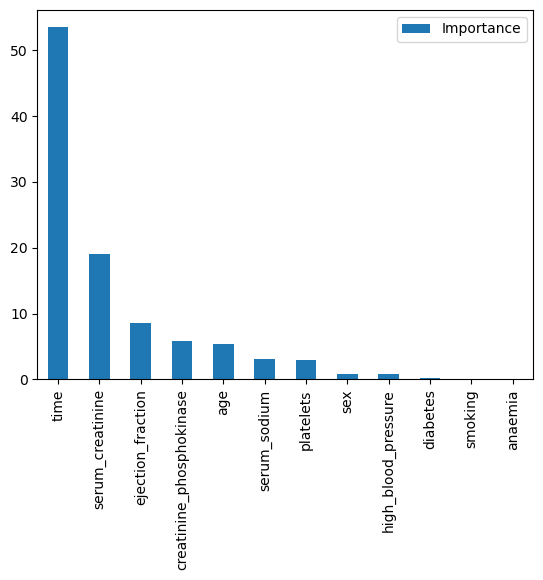

In [86]:
draw_feature_importance(cb_best_estimator, X)